# STA2101 Final Project

#### David Veitch
#### Code Used in Report - Toronto's Evolution of Attitudes Towards Real Estate

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.corpus import opinion_lexicon
from nltk.tokenize import treebank
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.util import *
from datetime import datetime  
from datetime import timedelta
pd.options.display.max_rows = 40
pd.options.display.max_columns = 30
%matplotlib inline

# Import Data

In [104]:
raw_data = pd.read_csv('NewspaperArticles.csv',encoding = "ISO-8859-1")
raw_data['Abstract'] = raw_data['Abstract'].fillna('NOTHING')
raw_data = raw_data[raw_data['Abstract']  != 'NOTHING']

article_year_distribution = pd.read_csv('TorStarArticleDistribution2.csv',header=0,index_col='year')

toronto_nhpi = pd.read_csv('TorontoNewHousePriceIndex.csv',header=0,index_col='year')
toronto_nhpi['real_px'] = toronto_nhpi['value']/toronto_nhpi['cpi_all_items']

In [105]:
raw_data

,Title,Abstract,StoreId,AccessionNumber,ArticleType,Authors,companies,copyright,digitalObjectIdentifier,documentType,entryDate,issn,language,languageOfSummary,pages,placeOfPublication,pubdate,pubtitle,year,DocumentURL,classification,classificationCodes,majorClassificationCodes,startPage,subjectClassifications,subjectTerms,FindACopy,Database
203,City budget strains vulnerable citizens,The city has an operating budget that pays f...,1854560060,NaN,Newspapers,"Pagliaro, Jennifer\nPagliaro\nJennifer\nJenni...",NaN,Copyright (c) 2017 Toronto Star. All Rights R...,"4290819761 , 109926112 , 82 , TSTR , TRSTTRST...",News,"Jan 2, 2017",0319-0781,English,NaN,NaN,"Toronto, Ont.","Jan 2, 2017",Toronto Star,2017,https://search.proquest.com/docview/1854560060...,NaN,NaN,NaN,GT.1,NaN,"Tax rates , Budgets , State court decisions ,...",http://bf4dv7zn3u.search.serialssolutions.com?...,NaN
204,"Paying more at pumps, welcome to 2017",First-time homebuyers will get a break on th...,1854560398,NaN,Newspapers,"Ferguson, Rob\nFerguson\nRob\nRob Ferguson , ...",NaN,Copyright (c) 2017 Toronto Star. All Rights R...,"4290820021 , 109926112 , 82 , TSTR , TRSTTRST...",News,"Jan 2, 2017",0319-0781,English,English,NaN,"Toronto, Ont.","Jan 2, 2017",Toronto Star,2017,https://search.proquest.com/docview/1854560398...,NaN,NaN,NaN,A.1,NaN,"Fees & charges , Emissions , Natural gas util...",http://bf4dv7zn3u.search.serialssolutions.com?...,NaN
205,What to do when your neighbour's an Airbnb?,An Airbnb next door is not an imminent crisi...,1854727258,NaN,Newspapers,"Micallef, Shawn\nMicallef\nShawn\nShawn Mical...",Airbnb\n561599,Copyright (c) 2017 Toronto Star. All Rights R...,"4291381371 , 109939172 , 82 , TSTR , TRSTTRST...",News,"Jan 3, 2017",0319-0781,English,English,NaN,"Toronto, Ont.","Jan 3, 2017",Toronto Star,2017,https://search.proquest.com/docview/1854727258...,NaN,NaN,NaN,A.1,NaN,"Rentals , Housing , Studies , Cities",http://bf4dv7zn3u.search.serialssolutions.com?...,NaN
206,Property tax debates are political reality,"""By adopting these measures, city council wo...",1855269122,NaN,Newspapers,"Keenan, Edward\nKeenan\nEdward\nEdward Keenan...",NaN,Copyright (c) 2017 Toronto Star. All Rights R...,"4293085991 , 109979012 , 82 , TSTR , TRSTTRST...",News,"Jan 5, 2017",0319-0781,English,NaN,NaN,"Toronto, Ont.","Jan 5, 2017",Toronto Star,2017,https://search.proquest.com/docview/1855269122...,NaN,NaN,NaN,GT.2,NaN,"Tax increases , Budgets , State court decisio...",http://bf4dv7zn3u.search.serialssolutions.com?...,NaN
207,Honest Ed's will be missed,Like a gambling addict quietly selling famil...,1855751493,NaN,Newspapers,NaN,NaN,Copyright (c) 2017 Toronto Star. All Rights R...,"4294111271 , 110000842 , 82 , TSTR , TRSTTRST...",Editorial,"Jan 6, 2017",0319-0781,English,NaN,NaN,"Toronto, Ont.","Jan 6, 2017",Toronto Star,2017,https://search.proquest.com/docview/1855751493...,NaN,NaN,NaN,A.10,NaN,NaN,http://bf4dv7zn3u.search.serialssolutions.com?...,NaN
208,Vancouver solution needed,With offshore purchasers being discouraged f...,1855752222,NaN,Newspapers,NaN,NaN,Copyright (c) 2017 Toronto Star. All Rights R...,"4294111331 , 110000842 , 82 , TSTR , TRSTTRST...",Editorial,"Jan 6, 2017",0319-0781,English,NaN,NaN,"Toronto, Ont.","Jan 6, 2017",Toronto Star,2017,https://search.proquest.com/docview/1855752222...,NaN,NaN,NaN,A.10,NaN,NaN,http://bf4dv7zn3u.search.serialssolutions.com?...,NaN
209,"Stop the cuts, raise taxes",[...]daycare fees in the city jumped 15 per ...,1856088139,NaN,Newspapers,NaN,NaN,Copyright (c) 2017 Toronto Star. All Rights R...,"4295386431 , 110021102 , 82 , TSTR , TRSTTRST...",Editorial,"Jan 7, 2017",0319-0781,English,NaN,NaN,"Toronto, Ont.","Jan 7, 2017",Toronto Star,2017,https://search.proquest.com/docview/1856088139...,NaN,NaN,NaN,IN.10,NaN,"Budgets , Low income groups , Tax rates , Pro...",http://bf4dv7zn3u.search.serialssolutions.com?...,NaN
210,Housing solution could be hiding in our backyards,The GTA housing market has been operating wi...,185

# LDA


In [106]:
from nltk.util import ngrams
from gensim.utils import simple_preprocess
 
data = list(raw_data['Abstract'].values)

In [111]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords
    
NUM_TOPICS_mid = 10
NUM_TOPICS_low_1 = 5
NUM_TOPICS_low_2 = 7
NUM_TOPICS_high_1 = 15
NUM_TOPICS_high_2 = 20

STOPWORDS = stopwords.words('english')
STOPWORDS = STOPWORDS + ['one','would','time','new','like','said','may','could','two','first','made','man','many',
                        'housing','home','per','cent','year','real','estate','says','homes','market',
                        'house','also','last','toronto','canada','buyers','years','sold','people',
                        'report','gta','month','average','since','nothing',
                        'get','see','chief','months','high','low','star','property','make','photo',
                        'photos','file','john','wilson','north','york','amp','going','cents','city','area',
                        'shr','want','much','cents','yesterday','net','think']

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in STOPWORDS and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
# For gensim we need to tokenize the data and filter out stopwords
tokenized_data = []
for text in data:
    tokenized_data.append(clean_text(text))
 
 
# Build a Dictionary - association word to numeric id
dictionary = corpora.Dictionary(tokenized_data)
 
# Transform the collection of texts to a numerical form
corpus = [dictionary.doc2bow(text) for text in tokenized_data]
 
# Build alternative LDA models
lda_model = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS_mid, id2word=dictionary, random_state=1)
lda_model_low_1 = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS_low_1, id2word=dictionary, random_state=1)
lda_model_low_2 = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS_low_2, id2word=dictionary, random_state=1)
lda_model_high_1 = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS_high_1, id2word=dictionary, random_state=1)
lda_model_high_2 = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS_high_2, id2word=dictionary, random_state=1)

In [112]:
# Print out results
for model in [lda_model_low_1,lda_model_low_2,lda_model,lda_model_high_1,lda_model_high_2]:
    print("LDA Model: "+str(model.num_topics))
    for idx in range(model.num_topics):
        # Print the first 10 most representative topics
        print("Topic #%s:" % idx, model.print_topic(idx, 5))
 
print("=" * 20)

LDA Model: 5
Topic #0: 0.016*"sales" + 0.010*"metro" + 0.009*"prices" + 0.009*"price" + 0.006*"million"
Topic #1: 0.010*"builders" + 0.008*"ontario" + 0.005*"builder" + 0.005*"million" + 0.005*"program"
Topic #2: 0.010*"mortgage" + 0.008*"tax" + 0.006*"bank" + 0.006*"metro" + 0.005*"rates"
Topic #3: 0.006*"room" + 0.006*"mortgage" + 0.005*"royal" + 0.005*"prices" + 0.005*"price"
Topic #4: 0.003*"apartment" + 0.003*"metro" + 0.002*"scarborough" + 0.002*"houses" + 0.002*"office"
LDA Model: 7
Topic #0: 0.017*"sales" + 0.012*"metro" + 0.010*"price" + 0.007*"million" + 0.007*"prices"
Topic #1: 0.012*"builders" + 0.010*"ontario" + 0.006*"builder" + 0.005*"program" + 0.005*"development"
Topic #2: 0.011*"mortgage" + 0.010*"tax" + 0.008*"metro" + 0.006*"government" + 0.005*"ontario"
Topic #3: 0.007*"mortgage" + 0.007*"room" + 0.005*"price" + 0.005*"prices" + 0.004*"bedroom"
Topic #4: 0.003*"metro" + 0.003*"office" + 0.003*"peterson" + 0.002*"company" + 0.002*"scarborough"
Topic #5: 0.006*"milli

#### Print Chosen Model with 7 Topics

In [115]:
for idx in range(NUM_TOPICS_low_2):
        # Print the first 10 most representative topics
        print("Topic #%s:" % idx, lda_model_low_2.print_topic(idx, 7))

Topic #0: 0.017*"sales" + 0.012*"metro" + 0.010*"price" + 0.007*"million" + 0.007*"prices" + 0.005*"median" + 0.004*"increase"
Topic #1: 0.012*"builders" + 0.010*"ontario" + 0.006*"builder" + 0.005*"program" + 0.005*"development" + 0.005*"warranty" + 0.004*"land"
Topic #2: 0.011*"mortgage" + 0.010*"tax" + 0.008*"metro" + 0.006*"government" + 0.005*"ontario" + 0.004*"bank" + 0.004*"income"
Topic #3: 0.007*"mortgage" + 0.007*"room" + 0.005*"price" + 0.005*"prices" + 0.004*"bedroom" + 0.004*"royal" + 0.003*"rates"
Topic #4: 0.003*"metro" + 0.003*"office" + 0.003*"peterson" + 0.002*"company" + 0.002*"scarborough" + 0.002*"even" + 0.002*"houses"
Topic #5: 0.006*"million" + 0.005*"controls" + 0.003*"company" + 0.002*"construction" + 0.002*"left" + 0.002*"sales" + 0.002*"three"
Topic #6: 0.011*"rates" + 0.011*"prices" + 0.008*"economy" + 0.008*"inflation" + 0.007*"sales" + 0.007*"bank" + 0.006*"rate"


#### Rename model and topics based on what was chosen

In [116]:
NUM_TOPICS = NUM_TOPICS_low_2
lda_model = lda_model_low_2

#### Evaluating the Topic Distribution of an Example Article

In [117]:
article1_example = raw_data['Abstract'].values[3]
article2_example = raw_data['Abstract'].values[3600]

In [118]:
example_tokenized_article_1 = dictionary.doc2bow(clean_text(article1_example))
example_tokenized_article_2 = dictionary.doc2bow(clean_text(article2_example))

In [119]:
example_1=lda_model[example_tokenized_article_1]
example_2=lda_model[example_tokenized_article_2]

In [120]:
print(lda_model.get_document_topics(example_tokenized_article_1, minimum_probability=0))
print(raw_data.iloc[3][['Title','pubdate']].values)
print(article1_example)

[(0, 0.0039796513), (1, 0.0039817), (2, 0.97613746), (3, 0.003973532), (4, 0.0039766235), (5, 0.003975431), (6, 0.0039755786)]
['Property tax debates are political reality' 'Jan 5, 2017']
  "By adopting these measures, city council would avoid significant property tax hikes, and, as we all know, property tax is regressive and has a significant impact on seniors," then-mayor David Miller said in September 2007, launching a campaign to sell Toronto residents on the idea of a "fair tax plan for Toronto" that included "revenue tools," including a vehicle registration tax and a land transfer tax.


In [121]:
print(lda_model.get_document_topics(example_tokenized_article_2, minimum_probability=0))
print(raw_data.iloc[3600][['Title','pubdate']].values)
print(article2_example)

[(0, 0.3812279), (1, 0.005968129), (2, 0.0059653753), (3, 0.13271278), (4, 0.0059760488), (5, 0.46216533), (6, 0.005984444)]
['Toronto home sales off to a strong start; Board eyes 6,000 sales for month Average price up 7% to $332,000'
 '19-Feb-05']
Up to Feb. 15, 2,924 homes were sold, a 14 per cent increase over the same period last year, said Toronto Real Estate Board president Ron Abraham. Areas that have experienced a surge in activity include Davisville, Willowdale and York Mills. Many parts of central Toronto including the downtown, Rosedale and Lawrence Manor have had many sales.


#### Evaluate Evolution of a Topic Over Time

In [130]:
topic_occurences = []

# create a list of dictionaries, one for each topic
for i in range(NUM_TOPICS):
    topic_occurences.append({})
    for j in range(1985,2018):
        topic_occurences[i][j] = 0

for article in raw_data.iterrows():
    article_year = article[1]['year']

    # use this as normalizing factor for topic occurences
    number_of_articles = raw_data[raw_data['year']==article_year].shape[0]
        
    tokenized_text = dictionary.doc2bow(clean_text(article[1]['Abstract']))
    topic_weights = lda_model[tokenized_text]

    
    for i in topic_weights:
        # to the dictionary for topic i, adds the weight of the articles topic to the year
        # associated with the article
        topic_occurences[i[0]][article_year] = topic_occurences[i[0]][article_year] + topic_weights[0][1]/number_of_articles
    
        

No handles with labels found to put in legend.


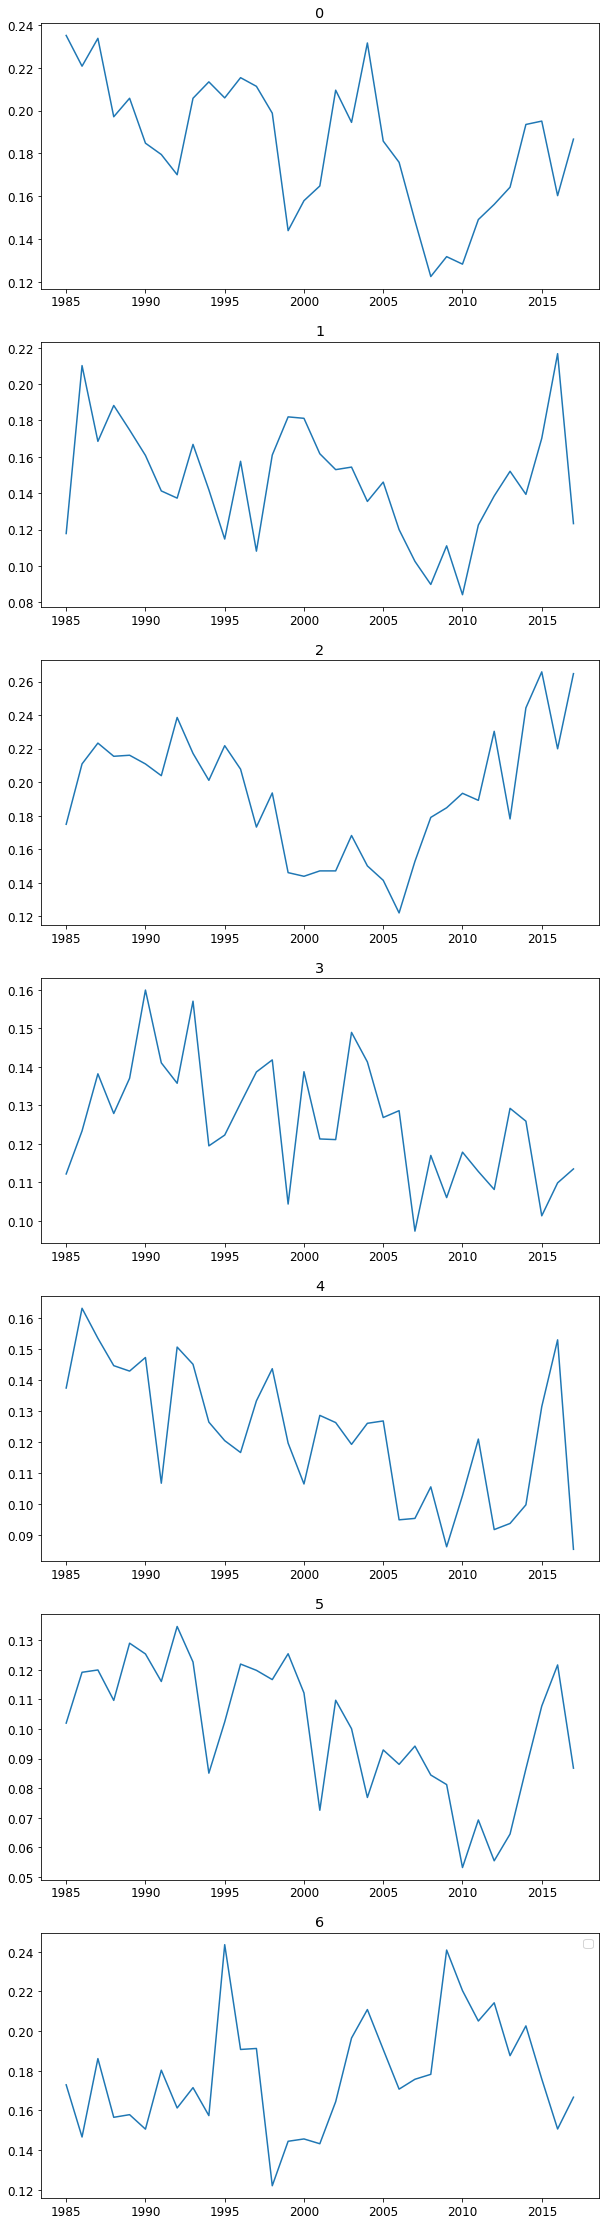

In [131]:
fig, axs = plt.subplots(NUM_TOPICS, figsize=(10,40))

for i in range(NUM_TOPICS):
    axs[i].plot(topic_occurences[i].keys(),topic_occurences[i].values())
    axs[i].set_title(i)
    
plt.legend()
plt.show()

C:\Users\David\Anaconda3\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "upper". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


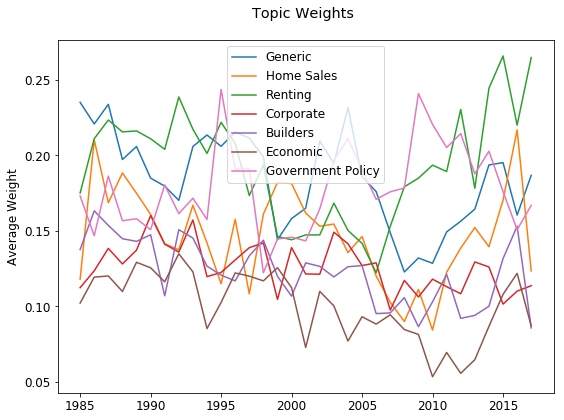

In [132]:
fig, ax1 = plt.subplots(figsize=(8,6))

for i in range(NUM_TOPICS):
    ax1.plot(topic_occurences[i].keys(),topic_occurences[i].values())
    #axs[i].set_title(i)
ax1.legend(loc='upper',ncol=1,labels=('Generic','Home Sales','Renting','Corporate','Builders','Economic','Government Policy')) 
ax1.set_title('Topic Weights \n')
ax1.set_ylabel('Average Weight')
plt.rcParams.update({'font.size': 12})
fig.tight_layout()
fig.savefig('topic_evolution',dpi=100)

# Toronto NHPI vs Government Topic

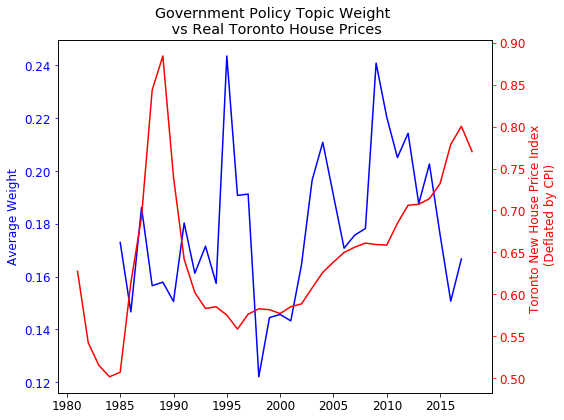

In [133]:
TOPIC_NUMBER = 6

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(topic_occurences[TOPIC_NUMBER].keys(),topic_occurences[TOPIC_NUMBER].values(),'b-')

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Average Weight', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(toronto_nhpi['real_px'],'r')
ax2.set_ylabel('Toronto New House Price Index \n (Deflated by CPI)', rotation=90, color='r')
ax2.tick_params('y', colors='r')

ax1.set_title('Government Policy Topic Weight \n vs Real Toronto House Prices')

fig.tight_layout()
plt.show()
fig.savefig('govt_policy_topic',dpi=1000)

# Sentiment Analysis

In [ ]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import treebank
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.util import mark_negation
from nltk.tokenize import word_tokenize

In [ ]:
sentiment_df = pd.DataFrame(columns=['Index','Title','Year','Total Words','Positive Words','Negative Words'])


for i in range(0,len(raw_data['Abstract'])):
    raw_sentence = raw_data.iloc[i]['Abstract']

    # Tokenize sentence
    tokenized_sentence = word_tokenize(raw_sentence)

    # Lowercase
    tokenized_sentence = ([s.lower() for s in tokenized_sentence])
    
    # Mark Negatives
    tokenized_sentence = mark_negation(tokenized_sentence)

    # Get rid of all punctuation
    tokenized_sentence = ([s.strip('.') for s in tokenized_sentence])
    tokenized_sentence = ([s.strip(',') for s in tokenized_sentence])
    tokenized_sentence = ([s.strip(';') for s in tokenized_sentence])
    tokenized_sentence = ([s.strip('\'') for s in tokenized_sentence])
    tokenized_sentence = ([s.strip('?') for s in tokenized_sentence])
    tokenized_sentence = ([s.strip('!') for s in tokenized_sentence])
    
    # Get rid of empty parts of a list
    tokenized_sentence = list(filter(None, tokenized_sentence))

    neut_words = 0
    pos_words = 0
    neg_words = 0

    for word in tokenized_sentence:

        # Assign a word_sign to each word, so if a word has
        # previously been negated assign -1, else 1
        if word[-4:] == '_NEG': 
            word_sign = -1
            # remove negation from word
            word = word[:-4]  
        else: 
            word_sign = 1

        if word_sign == 1:      
            if word in opinion_lexicon.positive():
                pos_words += 1
            elif word in opinion_lexicon.negative():
                neg_words += 1
            else:
                neut_words += 1

        if word_sign == -1:      
            if word in opinion_lexicon.negative():
                pos_words += 1
            elif word in opinion_lexicon.positive():
                neg_words += 1
            else:
                neut_words += 1

    tot_words = pos_words+neg_words+neut_words
    
    sentiment_df = sentiment_df.append(pd.DataFrame([[i,raw_data.iloc[i]['Title'],raw_data.iloc[i]['year'],
                                                      tot_words,pos_words,neg_words]],
                                                   columns=['Index','Title','Year','Total Words','Positive Words','Negative Words']))
    
    print(i)

sentiment_df.to_csv('master_sentiment.csv')

# Example Sentiment Sentence

In [123]:
raw_sentence = 'The market is great, fantastic even. Its Not a bad time to buy!'

# Tokenize sentence
tokenized_sentence = word_tokenize(raw_sentence)

# Lowercase
tokenized_sentence = ([s.lower() for s in tokenized_sentence])

# Mark Negatives
tokenized_sentence = mark_negation(tokenized_sentence)

# Get rid of all punctuation
tokenized_sentence = ([s.strip('.') for s in tokenized_sentence])
tokenized_sentence = ([s.strip(',') for s in tokenized_sentence])
tokenized_sentence = ([s.strip(';') for s in tokenized_sentence])
tokenized_sentence = ([s.strip('\'') for s in tokenized_sentence])
tokenized_sentence = ([s.strip('?') for s in tokenized_sentence])
tokenized_sentence = ([s.strip('!') for s in tokenized_sentence])


# Get rid of empty parts of a list
tokenized_sentence = list(filter(None, tokenized_sentence))

neut_words = 0
pos_words = 0
neg_words = 0

for word in tokenized_sentence:

    # Assign a word_sign to each word, so if a word has
    # previously been negated assign -1, else 1
    if word[-4:] == '_NEG': 
        word_sign = -1
        # remove negation from word
        word = word[:-4]  
    else: 
        word_sign = 1

    if word_sign == 1:      
        if word in opinion_lexicon.positive():
            pos_words += 1
            print(word,word_sign,'Positive')
        elif word in opinion_lexicon.negative():
            neg_words += 1
            print(word,word_sign,'Negative')
        else:
            neut_words += 1

    if word_sign == -1:      
        if word in opinion_lexicon.negative():
            pos_words += 1
            print(word,word_sign,'Positive')
        elif word in opinion_lexicon.positive():
            neg_words += 1
            print(word,word_sign,'Negative')
        else:
            neut_words += 1

tot_words = pos_words+neg_words+neut_words


great 1 Positive
fantastic 1 Positive
bad -1 Positive


In [124]:
tokenized_sentence

['the',
 'market',
 'is',
 'great',
 'fantastic',
 'even',
 'its',
 'not',
 'a_NEG',
 'bad_NEG',
 'time_NEG',
 'to_NEG',
 'buy_NEG']

# Example Sentiment

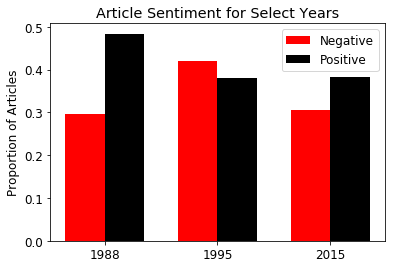

In [125]:
import numpy as np
import matplotlib.pyplot as plt

sent1995 = pd.read_csv('1995sentiment.csv')
sent1988 = pd.read_csv('1988sentiment.csv')
sent2015 = pd.read_csv('2015sentiment.csv')

sent1988['PosArticle']=(sent1988['Positive Words']>sent1988['Negative Words'])
sent1988['NegArticle']=(sent1988['Positive Words']<sent1988['Negative Words'])
sent1995['PosArticle']=(sent1995['Positive Words']>sent1995['Negative Words'])
sent1995['NegArticle']=(sent1995['Positive Words']<sent1995['Negative Words'])
sent2015['PosArticle']=(sent2015['Positive Words']>sent2015['Negative Words'])
sent2015['NegArticle']=(sent2015['Positive Words']<sent2015['Negative Words'])

N = 3
menMeans = (sent1988['NegArticle'].mean(), sent1995['NegArticle'].mean(), sent2015['NegArticle'].mean())

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width, color='red')

womenMeans = (sent1988['PosArticle'].mean(), sent1995['PosArticle'].mean(), sent2015['PosArticle'].mean())

rects2 = ax.bar(ind+width, womenMeans, width, color='black')

# add some
ax.set_ylabel('Proportion of Articles')
ax.set_title('Article Sentiment for Select Years')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('1988', '1995', '2015') )

ax.legend( (rects1[0], rects2[0]), ('Negative', 'Positive') )

plt.show()
fig.savefig('art_sentiment.png',dpi=1000)

# Master Sentiment

In [126]:
master_sent = pd.read_csv('master_sentiment.csv')

# Article is positive or negative if it has at least two more positive words than negative words or vise versa
master_sent['Pos_Article'] = (master_sent['Positive Words'] > (master_sent['Negative Words']+1)).astype(int)
master_sent['Neg_Article'] = (master_sent['Positive Words'] < (master_sent['Negative Words']-1)).astype(int)

pos_pct = []
neg_pct = []
pos_ct = []
neg_ct = []

for i in range(1985,2018):
    pos_pct.append(master_sent[master_sent['Year']==i]['Pos_Article'].mean())
    neg_pct.append(master_sent[master_sent['Year']==i]['Neg_Article'].mean())
    pos_ct.append(master_sent[(master_sent['Year']==i)&(master_sent['Pos_Article']==1)]['Pos_Article'].count())
    neg_ct.append(master_sent[(master_sent['Year']==i)&(master_sent['Neg_Article']==1)]['Neg_Article'].count())
    
spread = []
spread_ct = []

for i in range(0,len(pos_pct)):
    spread.append(pos_pct[i]-neg_pct[i])
    spread_ct.append(pos_ct[i]-neg_ct[i])

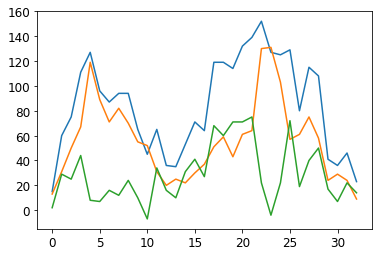

In [127]:
plt.plot(pos_ct)
plt.plot(neg_ct)
plt.plot(spread_ct)

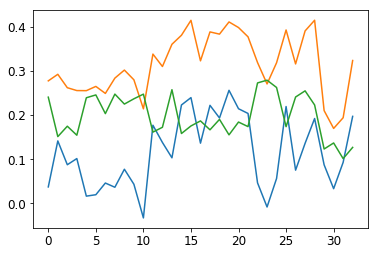

In [128]:
plt.plot(spread)
plt.plot(pos_pct)
plt.plot(neg_pct)

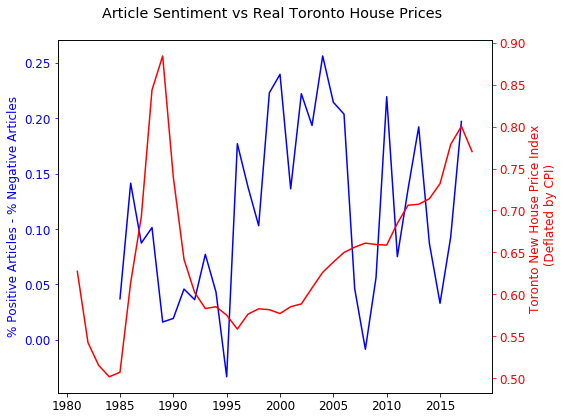

In [129]:
plt.rcParams.update({'font.size': 12})
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(np.linspace(1985,2017,33),spread,'b-')

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('% Positive Articles - % Negative Articles', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(toronto_nhpi['real_px'],'r')
ax2.set_ylabel('Toronto New House Price Index \n (Deflated by CPI)', rotation=90, color='r')
ax2.tick_params('y', colors='r')

ax1.set_title('Article Sentiment vs Real Toronto House Prices \n')

fig.tight_layout()
plt.show()
fig.savefig('sentiment_over_time',dpi=1000)